In [1]:
import os
import glob
import json

# Define the directory path
directory_path_test = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_test'
directory_path_val = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_val'


# Get a list of all JSON files in the directory
file_list = glob.glob(os.path.join(directory_path_test, '*.json'))
file_list_val = glob.glob(os.path.join(directory_path_val, '*.json'))


# Iterate through the list of files and read their content
for file_path in file_list:
    with open(file_path, 'r') as json_file:
        try:
            # Parse the JSON file
            data = json.load(json_file)
            print(f"Contents of {file_path}:")
            print(data)
        except json.JSONDecodeError as e:
            print(f"Error reading {file_path}: {e}")


# Iterate through the list of files and read their content
for file_path in file_list_val:
    with open(file_path, 'r') as json_file:
        try:
            # Parse the JSON file
            data = json.load(json_file)
            print(f"Contents of {file_path}:")
            print(data)
        except json.JSONDecodeError as e:
            print(f"Error reading {file_path}: {e}")

Contents of /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_test/user_396_test_round_results.json:
{'resource_category': 'Resourceless user', 'validation_results': {'Accuracy': [[0.6666666865348816, 0.6666666865348816, 0.6666666865348816], [0.4444444477558136, 0.6666666865348816, 0.6666666865348816], [0.5555555820465088, 0.3333333432674408, 0.3333333432674408], [0.6666666865348816, 0.4444444477558136, 0.4444444477558136], [0.4444444477558136, 0.6666666865348816, 0.4444444477558136], [0.6666666865348816, 0.6666666865348816, 0.6666666865348816], [0.5555555820465088, 0.4444444477558136, 0.4444444477558136], [0.5555555820465088, 0.6666666865348816, 0.4444444477558136], [0.6666666865348816, 0.4444444477558136, 0.6666666865348816], [0.6666666865348816, 0.4444444477558136, 0.6666666865348816], [0.4444444477558136, 0.6666666865348816, 0.6666666865348816], [0.5555555820465088, 0.6666666865348816, 0.4444444477558136], [0.5555555820465088, 0.6666666865348816, 0.

In [2]:
# Separate files into two categories
resourceless_files = []
resourceful_files = []

for file_path in file_list:
    with open(file_path, 'r') as json_file:
        try:
            # Parse the JSON file
            file_data = json.load(json_file)
            # Check the resource category and categorize the file
            if file_data.get('resource_category') == 'Resourceless user':
                resourceless_files.append(file_path)
            elif file_data.get('resource_category') == 'Resourceful user':
                resourceful_files.append(file_path)
        except json.JSONDecodeError as e:
            print(f"Error reading {file_path}: {e}")

print("Resourceless user files:", resourceless_files)
print("Resourceful user files:", resourceful_files)

Resourceless user files: ['/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_test/user_396_test_round_results.json', '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_test/user_191_test_round_results.json', '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_test/user_575_test_round_results.json', '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_test/user_153_test_round_results.json', '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_test/user_212_test_round_results.json', '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_test/user_440_test_round_results.json', '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_test/user_218_test_round_results.json', '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_test/user_499_test_rou

In [3]:
def calculate_average_min_info_cmae(file_list):
    min_values = []
    for file_path in file_list:
        with open(file_path, 'r') as json_file:
            try:
                file_data = json.load(json_file)
                info_cmae = file_data.get('validation_results', {}).get('info_cmae', [])
                if info_cmae:
                    min_values.append(min(info_cmae))
            except json.JSONDecodeError as e:
                print(f"Error reading {file_path}: {e}")
    print(min_values)
    return sum(min_values) / len(min_values), len(min_values) if min_values else None

# Calculate for resourceful and resourceless files
average_min_info_cmae_resourceful, no_rf = calculate_average_min_info_cmae(resourceful_files)
average_min_info_cmae_resourceless, no_rl = calculate_average_min_info_cmae(resourceless_files)
average_min_info_cmae_all, all_user = calculate_average_min_info_cmae(file_list)


print(f"Average minimum info_cmae for {no_rf} resourceful users: {average_min_info_cmae_resourceful}")
print(f"Average minimum info_cmae for {no_rl} resourceless users: {average_min_info_cmae_resourceless}")
print(f"Average minimum info_cmae for {all_user} all users: {average_min_info_cmae_all}")

[0.02171926498413086, 0.70482869942983, 1.4999696761369705, 0.03903116498674665, 1.4999872744083405, 0.9940588772296906, 0.6947768131891886, 0.4995005925496419, 1.6959506670633953, 0.6681834856669108, 0.49930715560913086, 1.2497688929239907, 0.4991769790649414, 1.6731986999511719, 1.610650030771891, 1.4163690249125165, 0.703560225168864, 0.4998314678668976, 1.2453231513500214, 2.6461925903956094, 1.6002336502075196, 0.6883287098672656, 0.6859947939713796, 0.4937986930211385, 0.21073837280273439, 1.0186073382695515, 0.9998613198598225, 0.986202769809299, 0.696368137995402, 1.4985437393188477, 2.990159809589386, 0.4995264212290446, 0.4999454816182454, 0.9999916553497314, 1.2488905668258667, 0.4999050696690877, 0.7864312966664633, 1.7904216316011217, 1.3892544110616047, 1.4999716480573018, 1.0653680165608723, 1.7099076906840007, 0.7020163536071777, 0.4995332956314087, 1.0175501505533855, 1.2487344145774841, 1.0101620422469246, 1.2482639948527017, 1.0, 1.0104536612828572, 0.999389946460723

In [4]:
def calculate_average_max_info_f1(file_list):
    max_values = []
    for file_path in file_list:
        with open(file_path, 'r') as json_file:
            try:
                file_data = json.load(json_file)
                info_f1 = file_data.get('validation_results', {}).get('info_f1', [])
                if info_f1:
                    max_values.append(max(info_f1))
            except json.JSONDecodeError as e:
                print(f"Error reading {file_path}: {e}")
    print(max_values)
    return sum(max_values) / len(max_values), len(max_values) if max_values else None


f1_avg_rf, no_rf = calculate_average_max_info_f1(resourceful_files)
f1_avg_rl, no_rl = calculate_average_max_info_f1(resourceless_files)
f1_avg_all, all_user = calculate_average_max_info_f1(file_list)

print("Average max f1 for resourceful files:", f1_avg_rf)
print("Average max f1 for resourceless files:", f1_avg_rl)
print("Average max f1 for all files:", f1_avg_all)

[1.0, 0.26666666666666666, 0.14285714285714288, 1.0, 0.07142857142857142, 0.15, 0.14814814814814817, 0.42857142857142855, 0.2222222222222222, 0.27777777777777773, 0.45454545454545453, 0.16666666666666666, 0.4444444444444445, 0.11111111111111112, 0.10909090909090909, 0.1, 0.27777777777777773, 0.25, 0.16666666666666666, 0.1904761904761905, 0.10909090909090909, 0.2222222222222222, 0.2222222222222222, 0.37499999999999994, 1.0, 0.24999999999999997, 0.42857142857142855, 0.4736842105263158, 0.2222222222222222, 0.4444444444444445, 0.3333333333333333, 0.42857142857142855, 0.37499999999999994, 0.25, 0.16666666666666666, 0.37499999999999994, 0.2727272727272727, 0.24999999999999997, 0.2222222222222222, 0.13636363636363635, 0.24242424242424243, 0.24999999999999997, 0.24242424242424243, 0.37499999999999994, 0.1904761904761905, 0.125, 0.2222222222222222, 0.15, 0.15, 0.1904761904761905, 0.17500000000000002, 0.37499999999999994, 0.4444444444444445, 0.1904761904761905, 0.05555555555555556, 0.19047619047

In [5]:
def calculate_average_min_info_mae(file_list):
    min_values = []
    for file_path in file_list:
        with open(file_path, 'r') as json_file:
            try:
                file_data = json.load(json_file)
                info_cmae = file_data.get('validation_results', {}).get('info_mae', [])
                if info_cmae:
                    min_values.append(min(info_cmae))
            except json.JSONDecodeError as e:
                print(f"Error reading {file_path}: {e}")
    print(min_values)
    return sum(min_values) / len(min_values), len(min_values) if min_values else None

# Calculate for resourceful and resourceless files
average_min_info_mae_resourceful, no_rf = calculate_average_min_info_mae(resourceful_files)
average_min_info_mae_resourceless, no_rl = calculate_average_min_info_mae(resourceless_files)
average_min_info_mae_all, all_user = calculate_average_min_info_mae(file_list)


print(f"Average minimum info_cmae for {no_rf} resourceful users: {average_min_info_mae_resourceful}")
print(f"Average minimum info_cmae for {no_rl} resourceless users: {average_min_info_mae_resourceless}")
print(f"Average minimum info_cmae for {all_user} all users: {average_min_info_mae_all}")

[0.02171926498413086, 0.5369274616241455, 0.9069396376609802, 0.03903116498674665, 1.7708476781845093, 0.7548021248408726, 0.48642315183367046, 0.3555790185928345, 1.749598741531372, 0.4763517379760742, 0.3201616605122884, 1.499863624572754, 0.3136585235595703, 1.2739801406860352, 1.4997225403785706, 1.6757460170321994, 0.43453543526785715, 0.44321703910827637, 0.9106055498123169, 2.387574243545532, 1.1255857348442078, 0.6237726211547852, 0.7497765570878983, 0.40202674865722654, 0.21073837280273439, 1.00597825050354, 0.5720955729484558, 0.22880423069000244, 0.5446598529815674, 0.6281215667724609, 2.990159809589386, 0.27369260787963867, 0.4050102233886719, 0.750408411026001, 0.9999248027801514, 0.43714027404785155, 0.6615247130393982, 1.8173151016235352, 1.4812302589416504, 1.017799973487854, 0.8011103698185512, 1.4010673761367798, 0.5888660975864956, 0.4053040504455566, 0.8105454444885254, 1.1680654684702556, 1.1225768327713013, 0.8794706889561245, 0.8586464439119611, 1.005070495605468

In [5]:
import json

def print_all_json_keys(file_list):
    def recursive_keys(d, prefix=''):
        keys = []
        for k, v in d.items():
            full_key = f"{prefix}.{k}" if prefix else k
            keys.append(full_key)
            if isinstance(v, dict):
                keys.extend(recursive_keys(v, full_key))
        return keys

    for file_path in file_list:
        print(f"\nAll keys in {file_path}:")
        try:
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)
                keys = recursive_keys(data)
                for key in keys:
                    print(key)
        except json.JSONDecodeError as e:
            print(f"Error reading {file_path}: {e}")

print_all_json_keys(file_list_val)


All keys in /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/val/user_66_val_round_results.json:
resource_category
validation_results
validation_results.Accuracy
validation_results.Precision
validation_results.Recall
validation_results.F1Score
validation_results.info_prec
validation_results.info_rec
validation_results.info_f1
validation_results.info_cmae
validation_results.info_mae

All keys in /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/val/user_34_val_round_results.json:
resource_category
validation_results
validation_results.Accuracy
validation_results.Precision
validation_results.Recall
validation_results.F1Score
validation_results.info_prec
validation_results.info_rec
validation_results.info_f1
validation_results.info_cmae
validation_results.info_mae

All keys in /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/val/user_84_val_round_results.json:
resource_category
validation_results
validation_results.Accuracy
validation_results.Prec

In [6]:
import json
import matplotlib.pyplot as plt
import os

def plot_metrics_side_by_side(file_list):
    output_dir = "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/val_plot"
    os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

    for file_path in file_list:
        try:
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)

                resource_category = data.get('resource_category', 'Unknown')
                val_results = data.get('validation_results', {})

                info_f1 = val_results.get('info_f1', [])
                info_cmae = val_results.get('info_cmae', [])
                info_mae = val_results.get('info_mae', [])

                if info_f1 and info_cmae and info_mae:
                    # Extract user ID from file name
                    filename = os.path.basename(file_path)  # e.g., user_33_test_round_results.json
                    user_id = filename.split('_test')[0]    # Extracts 'user_33'

                    # Plotting
                    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

                    axs[0].plot(info_f1)
                    axs[0].set_title('info_f1')
                    axs[0].set_xlabel('Index')
                    axs[0].set_ylabel('Value')
                    axs[0].grid(True)

                    axs[1].plot(info_cmae)
                    axs[1].set_title('info_cmae')
                    axs[1].set_xlabel('Index')
                    axs[1].set_ylabel('Value')
                    axs[1].grid(True)

                    axs[2].plot(info_mae)
                    axs[2].set_title('info_mae')
                    axs[2].set_xlabel('Index')
                    axs[2].set_ylabel('Value')
                    axs[2].grid(True)

                    fig.suptitle(f'{user_id} | Resource Category: {resource_category}', fontsize=16)
                    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

                    # Save the plot
                    save_path = os.path.join(output_dir, f"{user_id}_{resource_category}.png")
                    plt.savefig(save_path)
                    plt.close()  # Close to free memory

                else:
                    print(f"Missing data in {file_path}, skipping plot.")

        except json.JSONDecodeError as e:
            print(f"Error reading {file_path}: {e}")

plot_metrics_side_by_side(file_list_val)

ValueError: List of boxplot statistics and `positions` values must have same the length

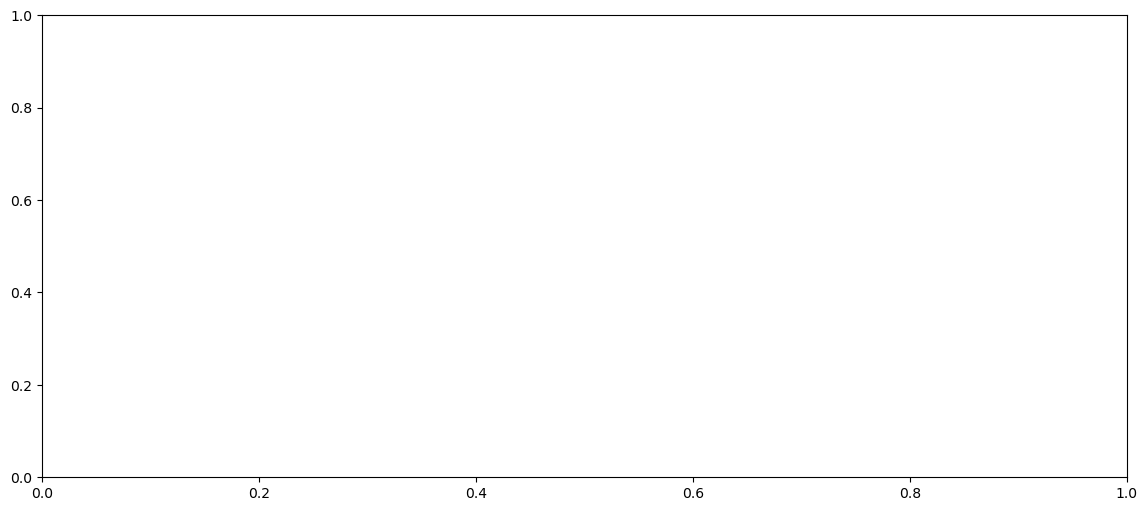

In [1]:
import os
import glob
import json
import matplotlib.pyplot as plt
import numpy as np

# Define your directory path
directory_path_val = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_val'
file_list_val = glob.glob(os.path.join(directory_path_val, '*.json'))

# Collect info_cmae lists
all_info_cmae = []

for file_path in file_list_val:
    with open(file_path, 'r') as json_file:
        try:
            file_data = json.load(json_file)
            info_cmae = file_data.get('validation_results', {}).get('info_cmae', [])
            if isinstance(info_cmae, list) and len(info_cmae) == 30:
                all_info_cmae.append(info_cmae)
        except json.JSONDecodeError:
            continue

# Ensure we have data
if not all_info_cmae:
    print("No valid info_cmae data found.")
    exit()

# Convert to NumPy array and transpose
info_cmae_array = np.array(all_info_cmae)        # shape (n_users, 30)
info_cmae_transposed = info_cmae_array.T         # shape (30, n_users)

# Create box plot per time step
plt.figure(figsize=(14, 6))
positions = list(range(1, 31))
plt.boxplot(info_cmae_transposed, positions=positions, patch_artist=True, showfliers=False)

# Customize x-axis ticks: only show every 5th
plt.xticks(ticks=range(1, 31, 5), labels=[str(i) for i in range(1, 31, 5)])

plt.title("Box Plot of info_cmae at Each Position Across Users")
plt.xlabel("Timestep Index in info_cmae (1 to 30)")
plt.ylabel("CMAE Value")
plt.grid(True)
plt.tight_layout()
plt.show()
